In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [4]:
X.shape

(569, 30)

In [5]:
X.head(10)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [6]:
y.head(10)

,Diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


In [7]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
print('Null values in feature::',X.isnull().sum())
print('Null values in target::',y.isnull().sum())

Null values in feature:: radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64
Null values in target:: Diagnosis    0
dtype: int64


In [9]:
# Malignant → 0, Benign → 1
y = y['Diagnosis'].map({'M': 0, 'B': 1})  

In [10]:
# Train-test split (80-20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# Feature scaling
scaler = Standardcaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
class BaselineModel:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []
        self.weights = None

    def _sigmoid(self, z):
        # Clip z to avoid overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y_true, y_pred):
        # Binary Cross-Entropy Loss (avoid log(0))
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights (including bias if not added externally)
        self.weights = np.zeros(n_features)
        
        for i in range(self.n_iterations):
            # Forward pass
            z = np.dot(X, self.weights)
            y_pred = self._sigmoid(z)
            
            # Compute loss
            loss = self._compute_loss(y, y_pred)
            print(f"Iteration {i+1}, Loss: {loss:.6f}")
            self.loss_history.append(loss)
            
            # Gradient computation
            gradient = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            
            # Update weights
            self.weights -= self.lr * gradient

        return self

    def predict_proba(self, X):
        z = np.dot(X, self.weights)
        return self._sigmoid(z)

    def predict(self, X):
        proba = self.predict_proba(X)  # This returns sigmoid outputs
        return (proba >= 0.5).astype(int) 

In [13]:
# Add bias term (for Logistic Regression baseline)
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

In [14]:
lr_model = BaselineModel(learning_rate=0.1, n_iterations=1000)
lr_model.fit(X_train_bias, y_train)


Iteration 1, Loss: 0.693147
Iteration 2, Loss: 0.520303
Iteration 3, Loss: 0.432024
Iteration 4, Loss: 0.378063
Iteration 5, Loss: 0.340960
Iteration 6, Loss: 0.313498
Iteration 7, Loss: 0.292132
Iteration 8, Loss: 0.274900
Iteration 9, Loss: 0.260620
Iteration 10, Loss: 0.248533
Iteration 11, Loss: 0.238129
Iteration 12, Loss: 0.229049
Iteration 13, Loss: 0.221034
Iteration 14, Loss: 0.213891
Iteration 15, Loss: 0.207473
Iteration 16, Loss: 0.201665
Iteration 17, Loss: 0.196378
Iteration 18, Loss: 0.191538
Iteration 19, Loss: 0.187088
Iteration 20, Loss: 0.182978
Iteration 21, Loss: 0.179168
Iteration 22, Loss: 0.175624
Iteration 23, Loss: 0.172318
Iteration 24, Loss: 0.169224
Iteration 25, Loss: 0.166322
Iteration 26, Loss: 0.163593
Iteration 27, Loss: 0.161020
Iteration 28, Loss: 0.158591
Iteration 29, Loss: 0.156293
Iteration 30, Loss: 0.154114
Iteration 31, Loss: 0.152045
Iteration 32, Loss: 0.150077
Iteration 33, Loss: 0.148203
Iteration 34, Loss: 0.146416
Iteration 35, Loss: 0.1

In [16]:
# Get predicted probabilities on test set
y_test_lr = lr_model.predict(X_test_bias)  # shape: (n_test,)

# Compute test loss using same loss function
test_loss = lr_model._compute_loss(y_test, y_test_lr)

print(f"Logistic Regression Test Loss: {test_loss:.6f}")

Logistic Regression Test Loss: 0.908922


In [18]:
def compute_metrics(y_true, y_pred):
    """
    Compute Accuracy, Precision, Recall, F1 for binary classification.
    Assumes labels are 0 and 1.
    """
    # True Positives, False Positives, etc.
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Handle division by zero
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }

In [20]:
print(y_test_lr)

[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [22]:
lr_metrics = compute_metrics(y_test, y_test_lr)
print("Logistic Regression Metrics:")
for metric, value in lr_metrics.items():
    print(f"  {metric}: {value:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.9737
  Precision: 0.9859
  Recall: 0.9722
  F1: 0.9790


In [30]:
class MLP:
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        self.architecture = architecture  # e.g., [30, 16, 8, 1]
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []
        self.parameters = {}
        self.cache = {}
        self.grads = {}
        self.initialize_parameters()

    def initialize_parameters(self):
        np.random.seed(42)
        for l in range(1, len(self.architecture)):
            self.parameters[f'W{l}'] = np.random.randn(
                self.architecture[l], self.architecture[l-1]
            ) * np.sqrt(2 / self.architecture[l-1])  # He initialization
            self.parameters[f'b{l}'] = np.zeros((self.architecture[l], 1))

    def _relu(self, Z):
        return np.maximum(0, Z)

    def _relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def _sigmoid(self, Z):
        Z = np.clip(Z, -500, 500)
        return 1 / (1 + np.exp(-Z))

    def forward_propagation(self, X):
        A = X.T  # shape: (n_features, m)
        self.cache['A0'] = A

        L = len(self.architecture) - 1
        for l in range(1, L):
            W = self.parameters[f'W{l}']
            b = self.parameters[f'b{l}']
            Z = np.dot(W, A) + b
            A = self._relu(Z)
            self.cache[f'Z{l}'] = Z
            self.cache[f'A{l}'] = A

        # Output layer (sigmoid for binary classification)
        W = self.parameters[f'W{L}']
        b = self.parameters[f'b{L}']
        Z = np.dot(W, A) + b
        A = self._sigmoid(Z)
        self.cache[f'Z{L}'] = Z
        self.cache[f'A{L}'] = A

        return A

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        y_true = y_true.reshape(1, -1)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def backward_propagation(self, X, y):
        m = X.shape[0]
        y = y.reshape(1, -1)
        L = len(self.architecture) - 1

        # Output layer gradient
        dZ = self.cache[f'A{L}'] - y  # derivative of BCE + sigmoid
        self.grads[f'dW{L}'] = (1/m) * np.dot(dZ, self.cache[f'A{L-1}'].T)
        self.grads[f'db{L}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        # Hidden layers (backprop)
        for l in range(L-1, 0, -1):
            dA = np.dot(self.parameters[f'W{l+1}'].T, dZ)
            dZ = dA * self._relu_derivative(self.cache[f'Z{l}'])
            self.grads[f'dW{l}'] = (1/m) * np.dot(dZ, self.cache[f'A{l-1}'].T)
            self.grads[f'db{l}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

    def fit(self, X, y):
        for i in range(self.n_iterations):
            # Forward
            A_final = self.forward_propagation(X)
            # Loss
            loss = self.compute_loss(y, A_final)
            print('Loss:',loss)
            self.loss_history.append(loss)
            # Backward
            self.backward_propagation(X, y)
            # Update
            L = len(self.architecture) - 1
            for l in range(1, L+1):
                self.parameters[f'W{l}'] -= self.lr * self.grads[f'dW{l}']
                self.parameters[f'b{l}'] -= self.lr * self.grads[f'db{l}']
        return self

    def predict_proba(self, X):
        A = self.forward_propagation(X)
        return A.flatten()

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)

In [32]:
y_train=np.array(y_train)

In [50]:
# Architecture: [input=30, hidden1=1,output=1]
mlp_model = MLP(architecture=[30,1, 1], learning_rate=0.01, n_iterations=1000)
mlp_model.fit(X_train, y_train)  # Note: no bias column needed — bias handled internally

Loss: 0.7587982566743475
Loss: 0.753238791404811
Loss: 0.7478527778992872
Loss: 0.7426387490959018
Loss: 0.7375305274503849
Loss: 0.7324008066075841
Loss: 0.7274395410123217
Loss: 0.7225913421922461
Loss: 0.7178238801055761
Loss: 0.7129335251747646
Loss: 0.7081006797713262
Loss: 0.7033618261487791
Loss: 0.6986683374374407
Loss: 0.6942135187447988
Loss: 0.6899886594392676
Loss: 0.6858927321559997
Loss: 0.6819702075959525
Loss: 0.6781948044179056
Loss: 0.6744632246203129
Loss: 0.6708241162223305
Loss: 0.6672450199988735
Loss: 0.6636585691273323
Loss: 0.6602061115322885
Loss: 0.6568708447326117
Loss: 0.6535846737269355
Loss: 0.6504213195262302
Loss: 0.647333542475045
Loss: 0.644310629283448
Loss: 0.6413477463540238
Loss: 0.6383667048583838
Loss: 0.6353986333106815
Loss: 0.6325212793177877
Loss: 0.6297561517657447
Loss: 0.6270854762041629
Loss: 0.6244925596011808
Loss: 0.6219402110499739
Loss: 0.6194648020535486
Loss: 0.6170539128771104
Loss: 0.6146986753574722
Loss: 0.6123588192229635
Los

In [52]:
y_pred_mlp=mlp_model.predict(X_test)
print(y_pred_mlp)

[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [110]:
mlp_metrics = compute_metrics(y_test, y_pred_mlp)
print("Logistic Regression Metrics:")
for metric, value in mlp_metrics.items():
    print(f"  {metric}: {value:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.9474
  Precision: 0.9459
  Recall: 0.9722
  F1: 0.9589


In [56]:
# Architecture: [input=30, hidden1=1,output=1]
mlp_model1 = MLP(architecture=[30,1, 1], learning_rate=0.1, n_iterations=1000)
mlp_model1.fit(X_train, y_train)  # Note: no bias column needed — bias handled internally

Loss: 0.7587982566743475
Loss: 0.7057441995983785
Loss: 0.6625366860873356
Loss: 0.6304829141701719
Loss: 0.6050158057861365
Loss: 0.5825488766073464
Loss: 0.5632812707666219
Loss: 0.5479574627812874
Loss: 0.5342087613015446
Loss: 0.522134234557612
Loss: 0.5114495444220907
Loss: 0.50188278655202
Loss: 0.49266018392375155
Loss: 0.4841400445519554
Loss: 0.476052208384858
Loss: 0.46836392796295884
Loss: 0.46100940973339916
Loss: 0.4538603792900812
Loss: 0.44700215903324364
Loss: 0.44031187287873286
Loss: 0.4337539347013748
Loss: 0.4273264193540251
Loss: 0.421110284704613
Loss: 0.4149225742388349
Loss: 0.4090190267591997
Loss: 0.40331584706252044
Loss: 0.3978005587165894
Loss: 0.39246831861674564
Loss: 0.38732245190966624
Loss: 0.3823625605543773
Loss: 0.3775886552289084
Loss: 0.3729485545945167
Loss: 0.3684359900561603
Loss: 0.36404516631793793
Loss: 0.35976081355785355
Loss: 0.35555863836490587
Loss: 0.35146536120354704
Loss: 0.3474855433690855
Loss: 0.3436122703225602
Loss: 0.3398443514

In [70]:
y_pred_mlp1=mlp_model1.predict(X_test)
print(y_pred_mlp1)

[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [72]:
lr_metrics = compute_metrics(y_test, y_pred_mlp1)
print("Logistic Regression Metrics:")
for metric, value in lr_metrics.items():
    print(f"  {metric}: {value:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.9474
  Precision: 0.9853
  Recall: 0.9306
  F1: 0.9571


In [98]:
# Architecture: [input=30, hidden1=1,output=1]
mlp_model2 = MLP(architecture=[30,16, 1], learning_rate=0.1, n_iterations=1000)
mlp_model2.fit(X_train, y_train)  # Note: no bias column needed — bias handled internally

Loss: 0.5254213516959997
Loss: 0.46831531627594813
Loss: 0.42380539014136254
Loss: 0.3880938392106437
Loss: 0.3590873473347669
Loss: 0.33531271107509997
Loss: 0.3153154495660114
Loss: 0.29808632464174595
Loss: 0.28324750005506477
Loss: 0.27040708558957893
Loss: 0.259128999703834
Loss: 0.24903670750206552
Loss: 0.239914997775862
Loss: 0.23172788278221282
Loss: 0.22433197967916443
Loss: 0.21758790683010323
Loss: 0.21140057895875683
Loss: 0.20571195610400791
Loss: 0.20044694573239977
Loss: 0.19548424896154026
Loss: 0.19085242965966392
Loss: 0.18650900531524006
Loss: 0.1824274191839848
Loss: 0.17855885725118542
Loss: 0.17492784884356935
Loss: 0.17150323391054498
Loss: 0.1682780926460671
Loss: 0.16523807397178503
Loss: 0.16236559457909425
Loss: 0.159645617410491
Loss: 0.15706306189666946
Loss: 0.15459589332835408
Loss: 0.15224671723460315
Loss: 0.14999539591600816
Loss: 0.14784281965732038
Loss: 0.1457864655559394
Loss: 0.1438210967964964
Loss: 0.1419439277595094
Loss: 0.14014672002036554
L

In [100]:
y_pred_mlp2=mlp_model2.predict(X_test)
print(y_pred_mlp2)

[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [102]:
lr_metrics = compute_metrics(y_test, y_pred_mlp2)
print("Logistic Regression Metrics:")
for metric, value in lr_metrics.items():
    print(f"  {metric}: {value:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.9737
  Precision: 0.9859
  Recall: 0.9722
  F1: 0.9790


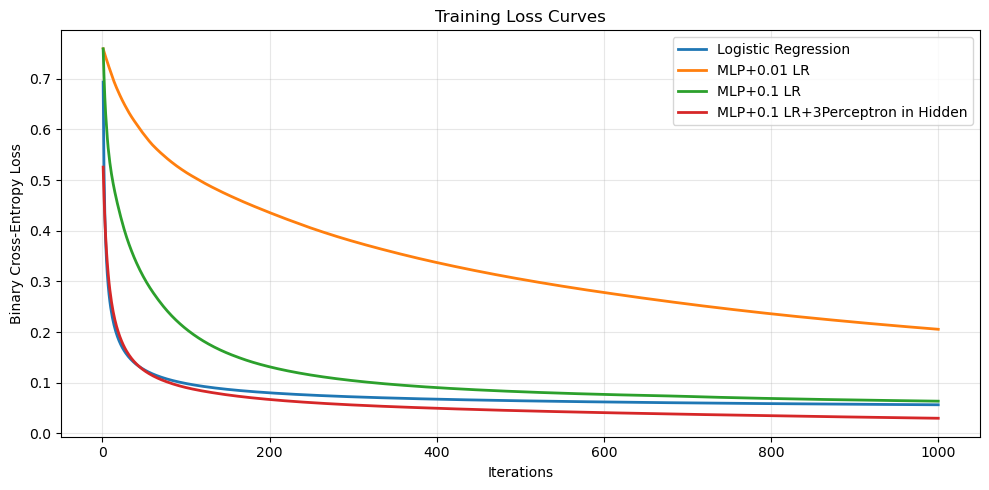

In [104]:
# Ensure both models have loss_history of same length (or plot separately)
plt.figure(figsize=(10, 5))

# Plot up to 1000 iterations
iterations = range(1, len(lr_model.loss_history) + 1)
plt.plot(iterations, lr_model.loss_history, label='Logistic Regression', linewidth=2)
plt.plot(iterations, mlp_model.loss_history, label='MLP+0.01 LR', linewidth=2)
plt.plot(iterations,mlp_model1.loss_history,label='MLP+0.1 LR',linewidth=2)
plt.plot(iterations,mlp_model2.loss_history,label='MLP+0.1 LR+3Perceptron in Hidden',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('loss_curves.png', dpi=150)  # Optional: save for report
plt.show()

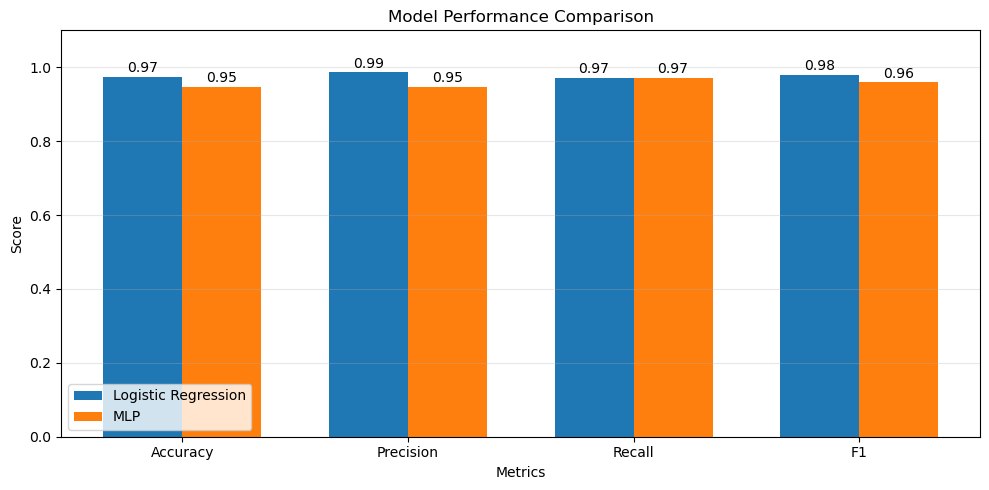

In [112]:
# Assuming you have:
# lr_metrics = {'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1': ...}
# mlp_metrics = {...}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
lr_values = [lr_metrics[m] for m in metrics]
mlp_values = [mlp_metrics[m] for m in metrics]

x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - width/2, lr_values, width, label='Logistic Regression', color='#1f77b4')
bars2 = plt.bar(x + width/2, mlp_values, width, label='MLP', color='#ff7f0e')

# Add value labels on bars
for bar in bars1 + bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=150)
plt.show()